In [4]:
import numpy as np
from astropy.io import fits
import glob
import os

# Base directory
base_dir = "/home/devika/PhD/S2/Obs_Astronomy/Image_Processing/Ckoirama_2025-12-19"

# Paths for dark frames
dark60s_path = os.path.join(base_dir, "DARK60S")
dark120s_path = os.path.join(base_dir, "DARK120S")

# Path to master bias
master_bias_path = os.path.join(base_dir,"BIAS", "master_bias_combined.fits")

def load_master_bias(bias_path):
    """
    Load the master bias frame
    
    Parameters:
    bias_path: path to master bias FITS file
    
    Returns:
    master_bias: 2D numpy array
    """
    if not os.path.exists(bias_path):
        print(f"ERROR: Master bias file not found at {bias_path}")
        print("Please check the filename and location of your master bias.")
        return None
    
    with fits.open(bias_path) as hdul:
        master_bias = hdul[0].data.astype(float)
    
    print(f"Master bias loaded from: {bias_path}")
    print(f"  Bias statistics - Mean: {np.mean(master_bias):.2f}, Median: {np.median(master_bias):.2f}")
    
    return master_bias

def create_master_dark(dark_folder, master_bias, output_name):
    """
    Create master dark frame using mean combination after bias subtraction
    
    Parameters:
    dark_folder: path to folder containing dark frames
    master_bias: 2D numpy array of master bias
    output_name: name for the output master dark file
    """
    # Get list of all FITS files in the dark folder
    dark_files = sorted(glob.glob(os.path.join(dark_folder, "*.fit*")))
    
    if len(dark_files) == 0:
        print(f"No FITS files found in {dark_folder}")
        return None
    
    print(f"\nProcessing {len(dark_files)} dark frames from {dark_folder}")
    
    # Read all dark frames and subtract bias
    dark_data = []
    for i, dark_file in enumerate(dark_files):
        with fits.open(dark_file) as hdul:
            data = hdul[0].data.astype(float)
            # Subtract master bias
            data_bias_subtracted = data - master_bias
            dark_data.append(data_bias_subtracted)
            if i == 0:
                header = hdul[0].header.copy()
        print(f"  Loaded and bias-subtracted: {os.path.basename(dark_file)}")
    
    # Stack and compute mean
    dark_stack = np.array(dark_data)
    master_dark = np.mean(dark_stack, axis=0)
    
    print(f"  Master dark statistics (after bias subtraction):")
    print(f"    Mean: {np.mean(master_dark):.2f}")
    print(f"    Median: {np.median(master_dark):.2f}")
    print(f"    Std Dev: {np.std(master_dark):.2f}")
    
    # Update header
    header['HISTORY'] = f'Master dark created from {len(dark_files)} frames'
    header['HISTORY'] = 'Combination method: mean'
    header['HISTORY'] = 'Master bias subtracted before combination'
    header['NCOMBINE'] = len(dark_files)
    header['BIASCOR'] = 'T'
    
    # Save master dark
    output_path = os.path.join(base_dir, output_name)
    fits.writeto(output_path, master_dark, header, overwrite=True)
    print(f"  Saved master dark to: {output_path}")
    
    return master_dark

# Load master bias
print("="*60)
print("Loading Master Bias")
print("="*60)
master_bias = load_master_bias(master_bias_path)

if master_bias is not None:
    # Create master dark for 60s exposure
    print("\n" + "="*60)
    print("Creating Master Dark for 60s exposure")
    print("="*60)
    master_dark_60s = create_master_dark(dark60s_path, master_bias, "master_dark_60s.fits")
    
    # Create master dark for 120s exposure
    print("\n" + "="*60)
    print("Creating Master Dark for 120s exposure")
    print("="*60)
    master_dark_120s = create_master_dark(dark120s_path, master_bias, "master_dark_120s.fits")
    
    print("\n" + "="*60)
    print("Master dark creation completed!")
    print("="*60)
    print(f"\nOutput files:")
    print(f"  - master_dark_60s.fits (bias-subtracted)")
    print(f"  - master_dark_120s.fits (bias-subtracted)")
    print(f"\nLocation: {base_dir}")
    print("\nThese master darks are ready to use for calibrating your science frames.")
else:
    print("\nERROR: Could not proceed without master bias.")
    print("Please ensure master_bias.fits exists in the base directory.")

Loading Master Bias
Master bias loaded from: /home/devika/PhD/S2/Obs_Astronomy/Image_Processing/Ckoirama_2025-12-19/BIAS/master_bias_combined.fits
  Bias statistics - Mean: 1011.20, Median: 1011.05

Creating Master Dark for 60s exposure

Processing 20 dark frames from /home/devika/PhD/S2/Obs_Astronomy/Image_Processing/Ckoirama_2025-12-19/DARK60S
  Loaded and bias-subtracted: DARK-0001_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0002_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0003_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0004_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0005_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0006_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0007_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0008_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0009_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0010_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0011_2x2_60s.fit
  Loaded and bias-subtracted: DARK-0012_2x2_60s.fit
  Loaded and bias-subtracted


Visualization saved to: /home/devika/PhD/S2/Obs_Astronomy/Image_Processing/Ckoirama_2025-12-19/dark_frame_comparison_60s.png


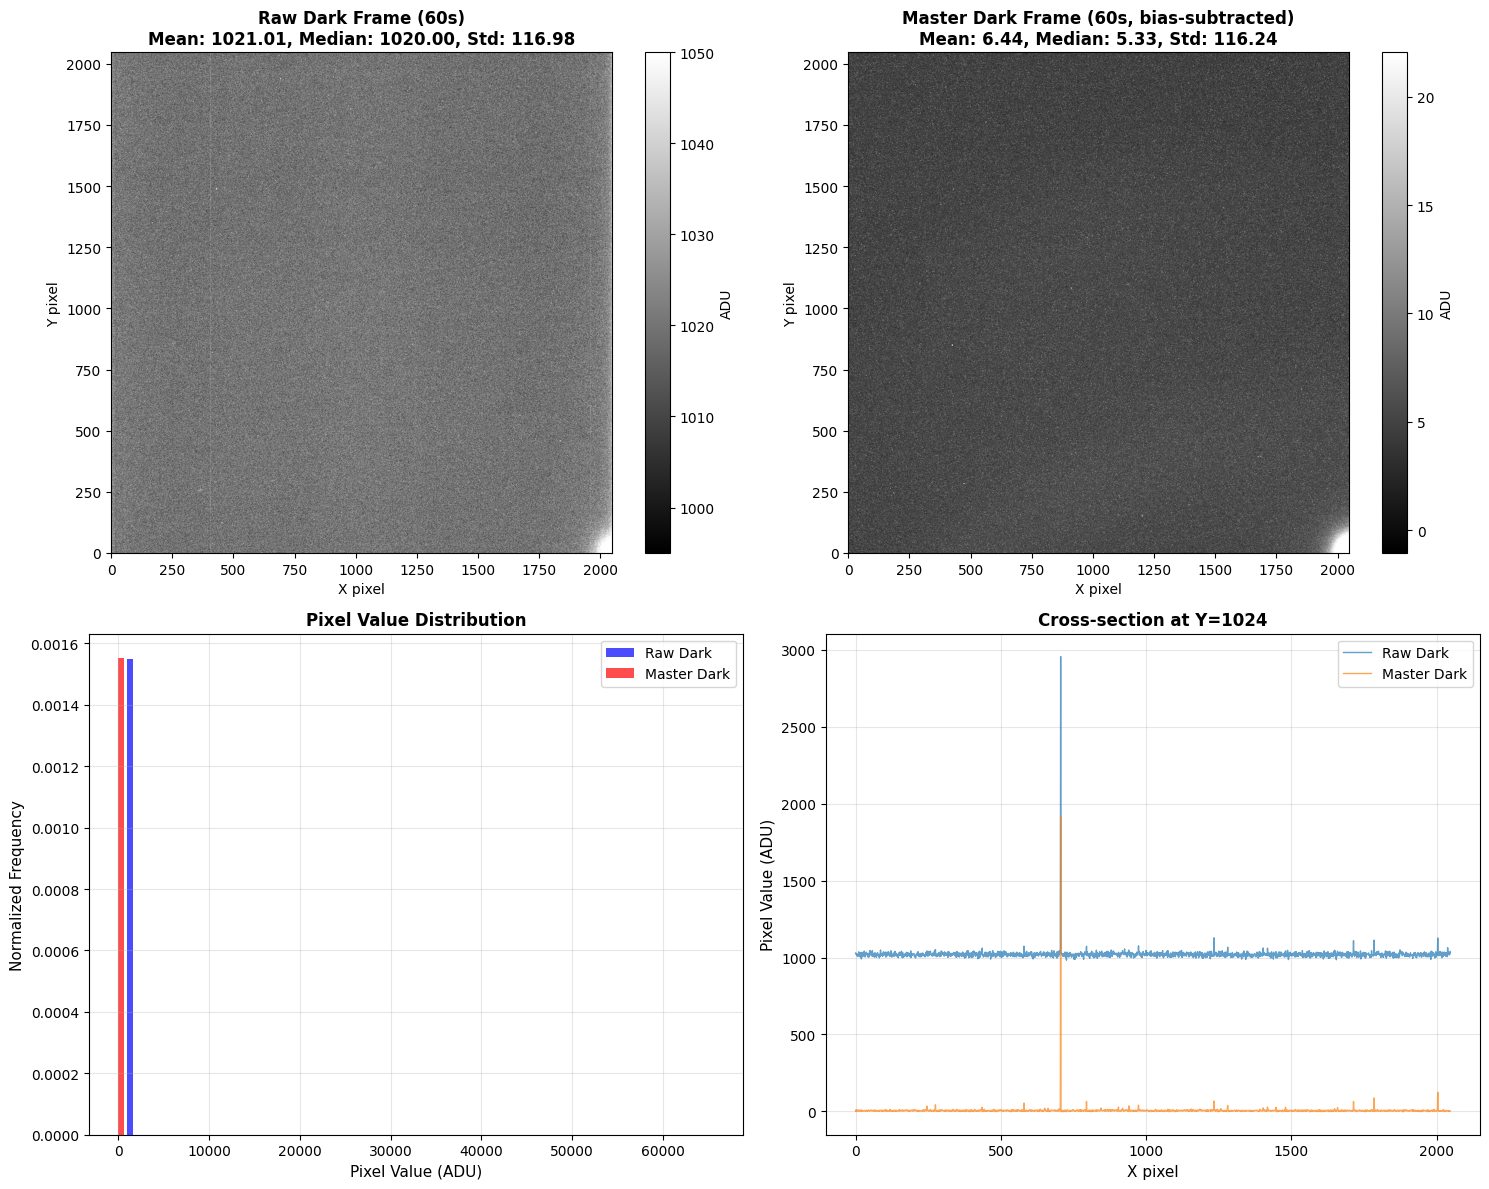


DARK FRAME STATISTICS (60s exposure)

Raw Dark Frame:
  Mean:    1021.01 ADU
  Median:  1020.00 ADU
  Std:      116.98 ADU
  Min:      965.00 ADU
  Max:    65535.00 ADU

Master Dark Frame (bias-subtracted):
  Mean:       6.44 ADU
  Median:     5.33 ADU
  Std:      116.24 ADU
  Min:       -8.39 ADU
  Max:    64341.89 ADU

Noise Reduction (Std Dev):
  Raw dark std: 116.98 ADU
  Master dark std: 116.24 ADU
  Improvement: 0.6%


In [6]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

# Base directory
base_dir = "/home/devika/PhD/S2/Obs_Astronomy/Image_Processing/Ckoirama_2025-12-19"

# Choose which exposure time to visualize (60 or 120)
exposure_time = 60  # Change to 120 if you want to see 120s darks

# Paths
if exposure_time == 60:
    raw_dark_path = os.path.join(base_dir, "DARK60S", "DARK-0001_2x2_60s.fit")
    master_dark_path = os.path.join(base_dir, "master_dark_60s.fits")
else:
    raw_dark_path = os.path.join(base_dir, "DARK120S", "DARK-0001_2x2_120s.fit")
    master_dark_path = os.path.join(base_dir, "master_dark_120s.fits")

# Load the frames
with fits.open(raw_dark_path) as hdul:
    raw_dark = hdul[0].data.astype(float)

with fits.open(master_dark_path) as hdul:
    master_dark = hdul[0].data.astype(float)

# Calculate statistics
raw_stats = {
    'mean': np.mean(raw_dark),
    'median': np.median(raw_dark),
    'std': np.std(raw_dark),
    'min': np.min(raw_dark),
    'max': np.max(raw_dark)
}

master_stats = {
    'mean': np.mean(master_dark),
    'median': np.median(master_dark),
    'std': np.std(master_dark),
    'min': np.min(master_dark),
    'max': np.max(master_dark)
}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Use appropriate color scale for each frame
vmin_raw = np.percentile(raw_dark, 1)
vmax_raw = np.percentile(raw_dark, 99)
vmin_master = np.percentile(master_dark, 1)
vmax_master = np.percentile(master_dark, 99)

# Raw dark frame
im1 = axes[0, 0].imshow(raw_dark, cmap='gray', vmin=vmin_raw, vmax=vmax_raw, origin='lower')
axes[0, 0].set_title(f'Raw Dark Frame ({exposure_time}s)\n' + 
                     f'Mean: {raw_stats["mean"]:.2f}, Median: {raw_stats["median"]:.2f}, Std: {raw_stats["std"]:.2f}',
                     fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('X pixel')
axes[0, 0].set_ylabel('Y pixel')
plt.colorbar(im1, ax=axes[0, 0], label='ADU')

# Master dark frame
im2 = axes[0, 1].imshow(master_dark, cmap='gray', vmin=vmin_master, vmax=vmax_master, origin='lower')
axes[0, 1].set_title(f'Master Dark Frame ({exposure_time}s, bias-subtracted)\n' + 
                     f'Mean: {master_stats["mean"]:.2f}, Median: {master_stats["median"]:.2f}, Std: {master_stats["std"]:.2f}',
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('X pixel')
axes[0, 1].set_ylabel('Y pixel')
plt.colorbar(im2, ax=axes[0, 1], label='ADU')

# Histogram comparison
axes[1, 0].hist(raw_dark.flatten(), bins=100, alpha=0.7, label='Raw Dark', color='blue', density=True)
axes[1, 0].hist(master_dark.flatten(), bins=100, alpha=0.7, label='Master Dark', color='red', density=True)
axes[1, 0].set_xlabel('Pixel Value (ADU)', fontsize=11)
axes[1, 0].set_ylabel('Normalized Frequency', fontsize=11)
axes[1, 0].set_title('Pixel Value Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Line profile comparison (middle row)
mid_row = raw_dark.shape[0] // 2
axes[1, 1].plot(raw_dark[mid_row, :], label='Raw Dark', alpha=0.7, linewidth=1)
axes[1, 1].plot(master_dark[mid_row, :], label='Master Dark', alpha=0.7, linewidth=1)
axes[1, 1].set_xlabel('X pixel', fontsize=11)
axes[1, 1].set_ylabel('Pixel Value (ADU)', fontsize=11)
axes[1, 1].set_title(f'Cross-section at Y={mid_row}', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(base_dir, f'dark_frame_comparison_{exposure_time}s.png'), dpi=150, bbox_inches='tight')
print(f"\nVisualization saved to: {os.path.join(base_dir, f'dark_frame_comparison_{exposure_time}s.png')}")

plt.show()

# Print detailed statistics
print("\n" + "="*60)
print(f"DARK FRAME STATISTICS ({exposure_time}s exposure)")
print("="*60)
print(f"\nRaw Dark Frame:")
print(f"  Mean:   {raw_stats['mean']:8.2f} ADU")
print(f"  Median: {raw_stats['median']:8.2f} ADU")
print(f"  Std:    {raw_stats['std']:8.2f} ADU")
print(f"  Min:    {raw_stats['min']:8.2f} ADU")
print(f"  Max:    {raw_stats['max']:8.2f} ADU")

print(f"\nMaster Dark Frame (bias-subtracted):")
print(f"  Mean:   {master_stats['mean']:8.2f} ADU")
print(f"  Median: {master_stats['median']:8.2f} ADU")
print(f"  Std:    {master_stats['std']:8.2f} ADU")
print(f"  Min:    {master_stats['min']:8.2f} ADU")
print(f"  Max:    {master_stats['max']:8.2f} ADU")

print(f"\nNoise Reduction (Std Dev):")
print(f"  Raw dark std: {raw_stats['std']:.2f} ADU")
print(f"  Master dark std: {master_stats['std']:.2f} ADU")
print(f"  Improvement: {(1 - master_stats['std']/raw_stats['std'])*100:.1f}%")